<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 6: Data Processing & Cleaning for Data Science: Data Wrangling Documents and Web Scraping

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Wrangling Documents and Web Scraping. It provides a set of practical Training challenges that allow grasping the different concepts presented in  lecture 6.

## Parsing and Processing Text Documents

### Challenge 1: 
Given the text shown in the code below, you are asked to do the basic parsing and processing text operations checklist seen in the lecture (Slides 4-9) to provide a basic text analysis report.

``` python
import string

text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
```

`Hint:`
These are some of the basic text analysis operations

* Reading & Extracting Texts
*  Basic Text Cleaning:
    * Removing unnecessary punctuation, tags
    * Tokenization
    * Removing stop words
* Basic words Analysis

In [173]:
#Your Solution here
text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""

import string

# Removing unneccessary punctuation and tags
translator = str.maketrans('','',string.punctuation + string.digits)
text = text.translate(translator)
print('1:')
print(text)

import nltk

# Tokenization
nltk.download('punkt_tab')
tokens = nltk.word_tokenize(text)
print('2:')
print(tokens)

# Removing stopwords
# nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('stopwords')
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = [w.lower() for w in tokens if w not in en_stopwords]
print('3:')
print(words)

from collections import Counter

# Word count
total_words = len(words)

# Unique words
unique_words = set(words)
unique_count = len(unique_words)

# Frequency of each word
word_freq = Counter(words)

# Average word length
average_word_length = sum(len(word) for word in words) / total_words

# Most common words (top 5)
most_common_words = word_freq.most_common(5)

# Results
print('4:words analysis')
print(f"Total words: {total_words}")
print(f"Unique words: {unique_count}")
print(f"Word frequencies: {word_freq}")
print(f"Average word length: {average_word_length:.2f}")
print(f"Most common words: {most_common_words}")

1:

Data science incorporates tools from multiple disciplines to gather a data set process and derive insights from the data set extract meaningful data from the set and interpret it for decisionmaking purposes 
The disciplinary areas that make up the data science field include mining statistics machine learning analytics and programming

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time
Using analytics th

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


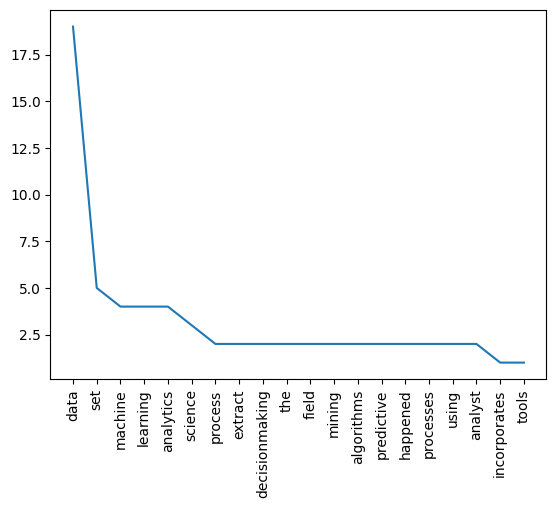

In [174]:
import matplotlib.pyplot as plt
cnt_fdist = nltk.FreqDist(words)
x,y =  [x[0] for x in cnt_fdist.most_common(20)],  [y[1] for y in cnt_fdist.most_common(20)]
plt.xticks(rotation=90)
plt.plot(x,y)

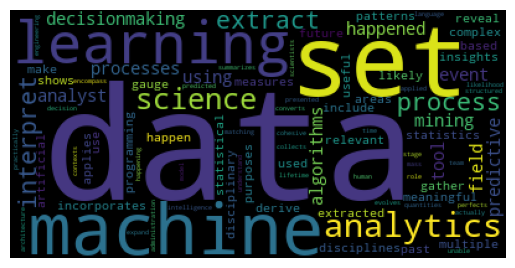

In [175]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(collocations=False).generate(' '.join(words))

plt.imshow(wordcloud)

plt.axis('off')
plt.show()

### Challenge 2:
You've just started a new data science position at the Cybersecurity Unit of the U.S. DEPARTMENT OF COMMERCE. The department wants to build, test, and evaluate new machine learning model using thier 2020 annual report document availabe in the local data folder:`2020_Cybersecurity_and_Privacy_Annual_Re.docx`. 

You are asked to provide a visual report summarizing the most common frequency keywords used in their report. 



In [176]:
#Your Solution here
from glob import glob
word_files = glob("data/2020_Cybersecurity_and_Privacy_Annual_Re.docx")

from docx import Document
from collections import Counter

# Load the Word document
doc = Document("data/2020_Cybersecurity_and_Privacy_Annual_Re.docx")  # replace with your file path

# Extract all text
text = "\n".join([para.text for para in doc.paragraphs])

import string

# Removing unneccessary punctuation and tags
translator = str.maketrans('','',string.punctuation + string.digits + '`')
text = text.translate(translator)
#print('1: ',text)

import nltk

# Tokenization
# nltk.download('punkt')
tokens = nltk.word_tokenize(text)
#print('2: ',tokens)

# Removing stopwords
# nltk.download('stopwords')
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = [w.lower() for w in tokens if w not in en_stopwords]
print('3: ',words[:200])

3:  ['cybersecurity', 'privacy', 'annual', 'report', 'nist', 'special', 'publication', 'cybersecurity', 'privacy', 'annual', 'report', 'patrick', 'o', '’', 'reilly', 'editor', 'computer', 'security', 'division', 'information', 'technology', 'laboratory', 'kristina', 'rigopoulos', 'editor', 'applied', 'cybersecurity', 'division', 'information', 'technology', 'laboratory', 'coeditors', 'larry', 'feldman', 'greg', 'witte', 'huntington', 'ingalls', 'industries', 'annapolis', 'junction', 'maryland', 'this', 'publication', 'is', 'available', 'free', 'of', 'charge', 'from', 'httpsdoiorgnistsp', 'september', 'us', 'department', 'of', 'commerce', 'gina', 'm', 'raimondo', 'secretary', 'national', 'institute', 'of', 'standards', 'and', 'technology', 'james', 'k', 'olthoff', 'performing', 'nonexclusive', 'functions', 'duties', 'under', 'secretary', 'commerce', 'standards', 'technology', 'director', 'national', 'institute', 'standards', 'technology', 'table', 'contents', 'foreword', 'with', 'day', 

[('nist', 201),
 ('cybersecurity', 137),
 ('privacy', 98),
 ('security', 97),
 ('the', 91),
 ('standards', 68),
 ('development', 63),
 ('risk', 59),
 ('information', 56),
 ('systems', 53),
 ('management', 53),
 ('’', 50),
 ('research', 47),
 ('in', 45),
 ('technology', 44),
 ('public', 44),
 ('software', 44),
 ('organizations', 43),
 ('sp', 43),
 ('fy', 42)]

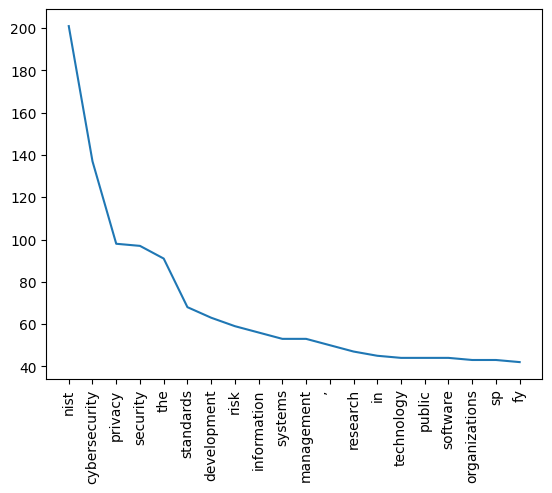

In [177]:
import matplotlib.pyplot as plt

# Basic words Analysis
cnt_fdist = nltk.FreqDist(words)
x,y =  [x[0] for x in cnt_fdist.most_common(20)],  [y[1] for y in cnt_fdist.most_common(20)]
plt.xticks(rotation=90)
plt.plot(x,y)
cnt_fdist.most_common(20)

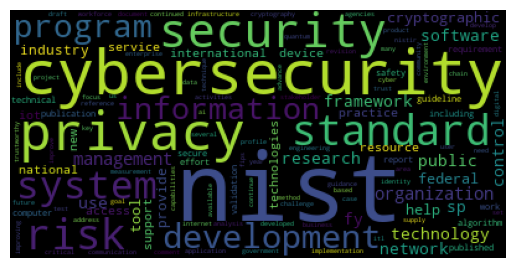

In [178]:
from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False).generate(' '.join(words))

plt.imshow(wordcloud)

plt.axis('off')
plt.show()

## Web Scraping: Parsing and processing Web Pages: Static Web Pages
### Challenge 3:
We want to analyse text collected from https://en.wikipedia.org/wiki/Data_science  wikipedia page. We are only interested on the text content of links html anchor (`a`).  

1. Do the cheklist basic text analyses to provid a visyal summarry of all href text links available on the page.

`Hint:`
1. Follow and adjust the procedures in Lecture 6 - Slides: 14-16 - to collect the required text. In case, you have not figured out how to collect the required information, here is below a code that help you:


``` python
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
import lxml

url = 'https://en.wikipedia.org/wiki/Data_science'
# Add a User-Agent header to mimic a web browser
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
req = Request(url, headers=headers)

page = urlopen(req).read().decode('utf-8')

soup = bs(page)

links = soup.find_all('a')
all_link_text = []

all_link_text.extend([a.text for a in links])

text = ' '.join(all_link_text)
text
``` 

2. Follow the checklist text analysis to clean and visualize the most common words used in the collected text.


Total words: 879
Unique words: 538
Average word length: 6.83
Most common words:
data: 58
science: 34
doi: 17
edit: 13
analysis: 9
issn: 9
isbn: 9
big: 8
s2cid: 6
21st: 6
century: 6
computing: 5
information: 5
statistics: 5
business: 5
statistical: 5
b: 5
sexiest: 5
job: 5
6: 4


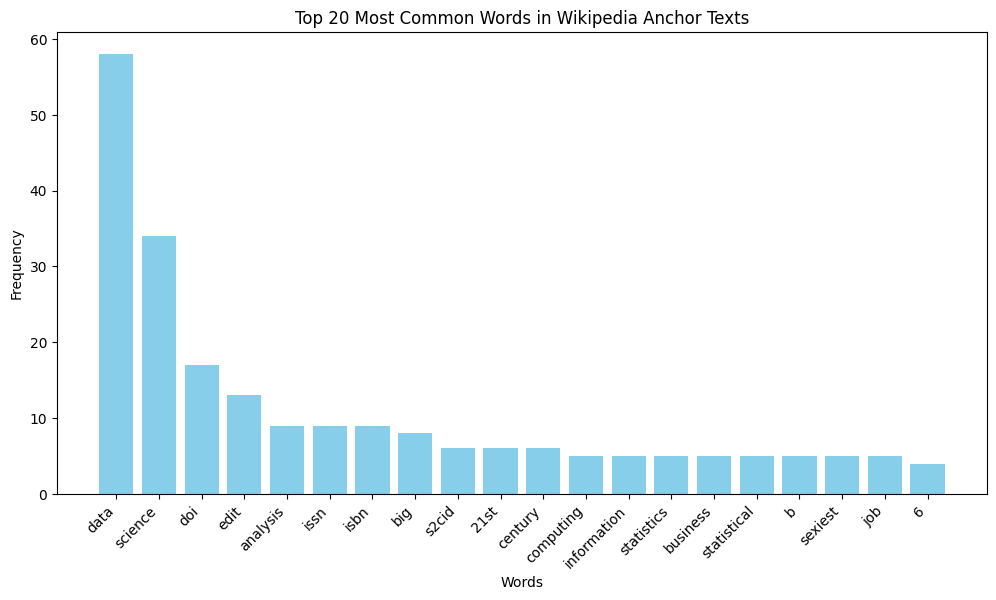

In [179]:
# Your Code here
# Step 1: Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
from collections import Counter
import string
import matplotlib.pyplot as plt

# Step 2: Fetch the Wikipedia page
url = 'https://en.wikipedia.org/wiki/Data_science'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                         'AppleWebKit/537.36 (KHTML, like Gecko) '
                         'Chrome/58.0.3029.110 Safari/537.3'}

req = Request(url, headers=headers)
page = urlopen(req).read().decode('utf-8')

# Step 3: Parse HTML
soup = bs(page, 'lxml')

# Step 4: Extract all <a> anchor text
links = soup.find_all('a')
all_link_text = [a.text.strip() for a in links if a.text.strip()]  # remove empty text
text = ' '.join(all_link_text)

# Step 5: Clean text
text_clean = text.lower().translate(str.maketrans('', '', string.punctuation))
words = text_clean.split()

# Tokenization
# nltk.download('punkt')
tokens = nltk.word_tokenize(text_clean)
# print(tokens)

# Removing stopwords
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = [w.lower() for w in tokens if w not in en_stopwords]

# Step 6: Basic text analysis
total_words = len(words)
unique_words = set(words)
unique_count = len(unique_words)
word_freq = Counter(words)
average_word_length = sum(len(word) for word in words) / total_words
most_common_words = word_freq.most_common(20)  # top 20 words

# Step 7: Print summary
print(f"Total words: {total_words}")
print(f"Unique words: {unique_count}")
print(f"Average word length: {average_word_length:.2f}")
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Step 8: Visualize the most common words
words_plot, freq_plot = zip(*most_common_words)

plt.figure(figsize=(12,6))
plt.bar(words_plot, freq_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Common Words in Wikipedia Anchor Texts")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


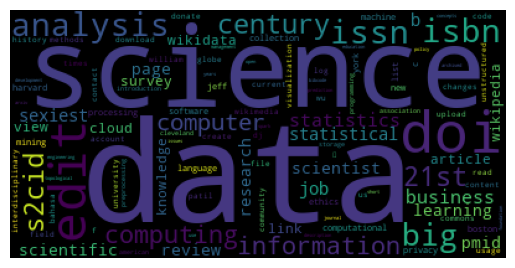

In [180]:
from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False).generate(' '.join(words))

plt.imshow(wordcloud)

plt.axis('off')
plt.show()


### Challenge 4:
We want to analyse text related to data science topic collected from different web pages: https://www.heavy.ai/learn/data-science,  https://en.wikipedia.org/wiki/Data_science, https://www.ibm.com/cloud/learn/data-science-introduction, and https://deepai.org/machine-learning-glossary-and-terms/data-science alongside with the text string object of challenge 01.

Note that we are only interested on the text content of  html anchor (`p`) from the webpages.  

1. Do the required procedures to collect all  `p` text available on all of the aformentioned web pages.
2. Append the collected text with the text string object of challenge 01
3. Do the cheklist basic text analyses to provid a visyal summarry of the most frequently used keywords on the resulted text.



Failed to fetch https://www.heavy.ai/learn/data-science: <urlopen error [SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)>
Total words: 879
Unique words: 538
Average word length: 6.83
Most common words:
data: 58
science: 34
doi: 17
edit: 13
analysis: 9
issn: 9
isbn: 9
big: 8
s2cid: 6
21st: 6
century: 6
computing: 5
information: 5
statistics: 5
business: 5
statistical: 5
b: 5
sexiest: 5
job: 5
6: 4


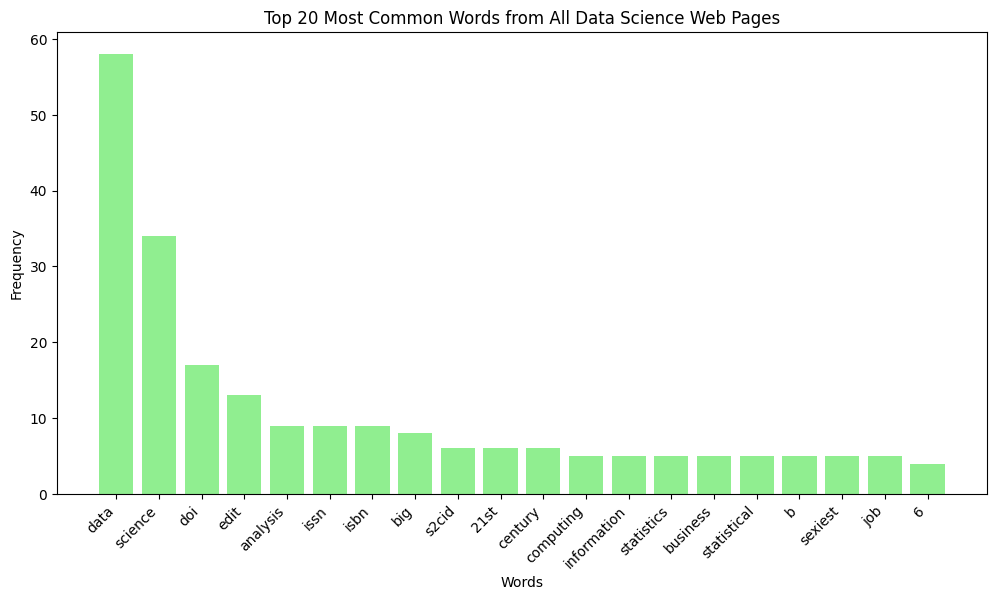

In [181]:
#Your Solution
# Step 1: Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
from collections import Counter
import string
import matplotlib.pyplot as plt

# Step 2: Define all URLs
urls = [
    "https://www.heavy.ai/learn/data-science",
    "https://en.wikipedia.org/wiki/Data_science",
    "https://www.ibm.com/cloud/learn/data-science-introduction",
    "https://deepai.org/machine-learning-glossary-and-terms/data-science"
]

# Step 3: Function to fetch <p> text from a webpage
def fetch_paragraph_text(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                             'AppleWebKit/537.36 (KHTML, like Gecko) '
                             'Chrome/58.0.3029.110 Safari/537.3'}
    try:
        req = Request(url, headers=headers)
        page = urlopen(req).read().decode('utf-8')
        soup = bs(page, 'lxml')
        paragraphs = [p.text.strip() for p in soup.find_all('p') if p.text.strip()]
        return " ".join(paragraphs)
    except Exception as e:
        print(f"Failed to fetch {url}: {e}")
        return ""

# Step 4: Collect text from all URLs
all_text = ""
for url in urls:
    all_text += fetch_paragraph_text(url) + " "

# Step 5: Append Challenge 1 text (replace with your variable)
challenge01_text =  """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
all_text += challenge01_text

# Step 6: Clean text
clean_text = all_text.lower().translate(str.maketrans('', '', string.punctuation))
words = clean_text.split()

# Tokenization
# nltk.download('punkt')
tokens = nltk.word_tokenize(text_clean)
# print(tokens)

# Removing stopwords
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
en_stopwords = set(en_stopwords)
words = [w.lower() for w in tokens if w not in en_stopwords]

# Step 7: Basic text analysis
total_words = len(words)
unique_words = set(words)
unique_count = len(unique_words)
word_freq = Counter(words)
average_word_length = sum(len(word) for word in words) / total_words
most_common_words = word_freq.most_common(20)  # top 20

# Step 8: Print summary
print(f"Total words: {total_words}")
print(f"Unique words: {unique_count}")
print(f"Average word length: {average_word_length:.2f}")
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Step 9: Visualize most common words
words_plot, freq_plot = zip(*most_common_words)

plt.figure(figsize=(12,6))
plt.bar(words_plot, freq_plot, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Most Common Words from All Data Science Web Pages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


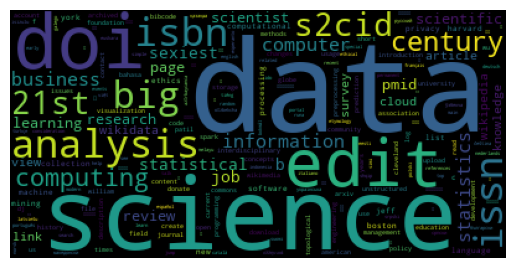

In [182]:
from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False).generate(' '.join(words))

plt.imshow(wordcloud)

plt.axis('off')
plt.show()

### Challenge 5:

You're in the initial stages of a new position as a Data Scientist at Goodreads (https://www.goodreads.com/) company. Your primary task is to build a robust understanding of customer sentiments and preferences related to quots, focusing on the `Motivational` tag.

The team you're collaborating with has a specific interest in quotes text, authors or Book titles, tags, and number of likes  from the `Motivational` tag on Goodreads as shown in the figure. They've tasked you with conducting web scraping and basic text analysis on quotes from this category. Your goal is to provide insights into the most frequently occurring keywords by author, or book title, or keyword tags.


<figure>
  <IMG src="figures/goodbooks.png"  ALIGN="right">
</figure>

#### II.  Requirements:

##### 1. Web Scraping and data collection:

1. Scraping the required contents from the two following first 5 pages:
  *  https://www.goodreads.com/quotes/tag/motivational?page=1
  *  https://www.goodreads.com/quotes/tag/motivational?page=2
  *  https://www.goodreads.com/quotes/tag/motivational?page=3
  *  https://www.goodreads.com/quotes/tag/motivational?page=4
  *  https://www.goodreads.com/quotes/tag/motivational?page=5
  
2. Store the scraped data in a dataframe with the approporiat columns names 
##### 2. Text Analysis:

1. Performing basic text analysis and generate a visulaization report on:
  - The overall quot texts of the entire dataframe to identify the most common frequency keywords.
  - The quot texts by author or book title, or tag
2. Using the apropriate chart type, Visualize the number of likes  by author or booktitle or by tag.




### Hints:
1- Consider using the Browser Dev. Tools for further assistance and html componenets inspections to identify the appropriat related contents html css classes and tags.For example, each quote detail text is displayed in an html markup `div` with class name: `quoteText`.
You may get any `<html_markup_name>` contents for a specific class name by using the following code: 
``` python
soup.find_all("<html_markup_name>", {"class": "<class_name>"})
```






In [183]:

import requests
def scrape_goodreads_page(url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = bs(response.text, 'lxml')
    
    quotes_data = []
    
    quotes = soup.find_all("div", {"class": "quote"})
    
    for quote in quotes:
        # Texte du quote
        text_div = quote.find("div", {"class": "quoteText"})
        if text_div:
            text = text_div.get_text(strip=True).split('”')[0].replace('“','').replace('”','').strip()
        else:
            text = ''
        
        # Auteur
        author = text_div.find('span', {"class": "authorOrTitle"})
        author = author.text.strip() if author else ''
        
        # Tags
        tag_div = quote.find("div", {"class": "greyText smallText left"})
        tags = [t.strip() for t in tag_div.text.replace('tags:','').split(',')] if tag_div else []
        
        # Nombre de likes
        likes_span = quote.find("a", {"class": "smallText"})
        likes = int(likes_span.text.split()[0]) if likes_span else 0
        
        quotes_data.append({
            'quote_text': text,
            'author': author,
            'tags': tags,
            'likes': likes
        })
    
    return quotes_data
   


In [184]:
import pandas as pd
all_quotes = []

for page in range(1, 6):
    url = f'https://www.goodreads.com/quotes/tag/motivational?page={page}'
    all_quotes.extend(scrape_goodreads_page(url))

df = pd.DataFrame(all_quotes)
print(df.head())


                                          quote_text           author  \
0  I must not fear. Fear is the mind-killer. Fear...   Frank Herbert,   
1  Attitude is a choice. Happiness is a choice. O...  Roy T. Bennett,   
2  Don't be pushed around by the fears in your mi...  Roy T. Bennett,   
3  Believe in yourself. You are braver than you t...  Roy T. Bennett,   
4  Live the Life of Your Dreams: Be brave enough ...  Roy T. Bennett,   

                                                tags  likes  
0  [bene-gesserit, fear, litany-against-fear, mot...  16703  
1  [attitude, choice, giving, happiness, inspirat...   9937  
2  [dreams, fearless, heart, inspiration, inspira...   9722  
3  [achievement, believe-in-yourself, brave, cour...   6954  
4  [brave, courage, dreams, inspiration, inspirat...   6682  


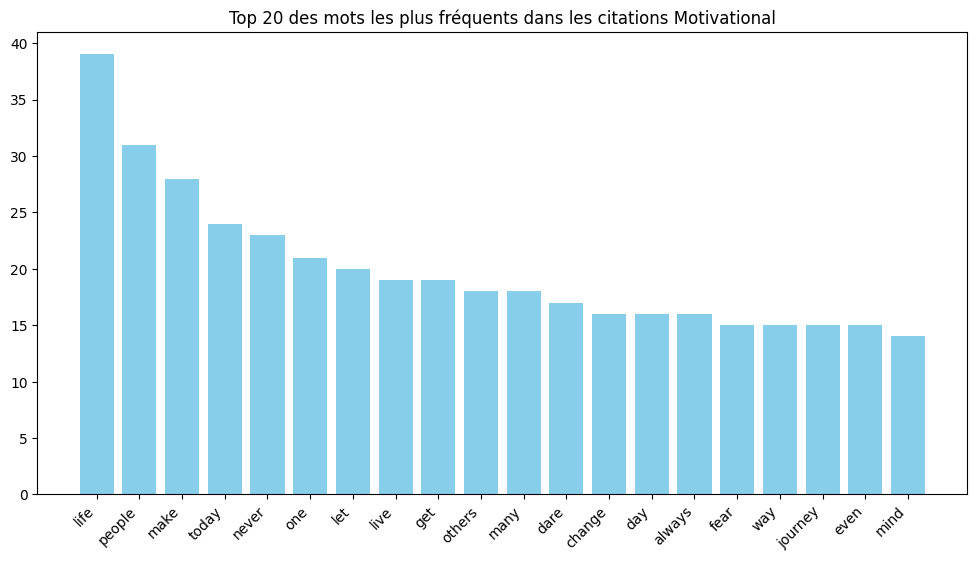

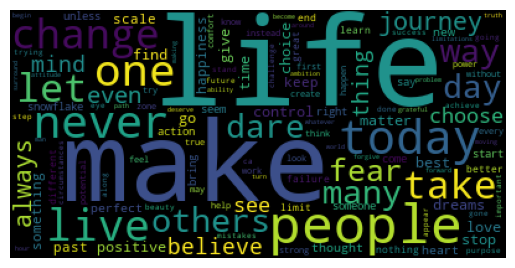

In [185]:
#Analyse de texte globale
# Nettoyage et tokenisation
stop_words = set(stopwords.words('english'))
all_text = ' '.join(df['quote_text']).lower()
tokens = nltk.word_tokenize(all_text)
words = [w for w in tokens if w.isalpha() and w not in stop_words]

# Compter les mots les plus fréquents
word_freq = Counter(words)
most_common_words = word_freq.most_common(20)

# Visualisation
words_plot, freq_plot = zip(*most_common_words)
plt.figure(figsize=(12,6))
plt.bar(words_plot, freq_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 des mots les plus fréquents dans les citations Motivational")
plt.show()
from wordcloud import WordCloud
wordcloud = WordCloud(collocations=False).generate(' '.join(words))

plt.imshow(wordcloud)

plt.axis('off')
plt.show()


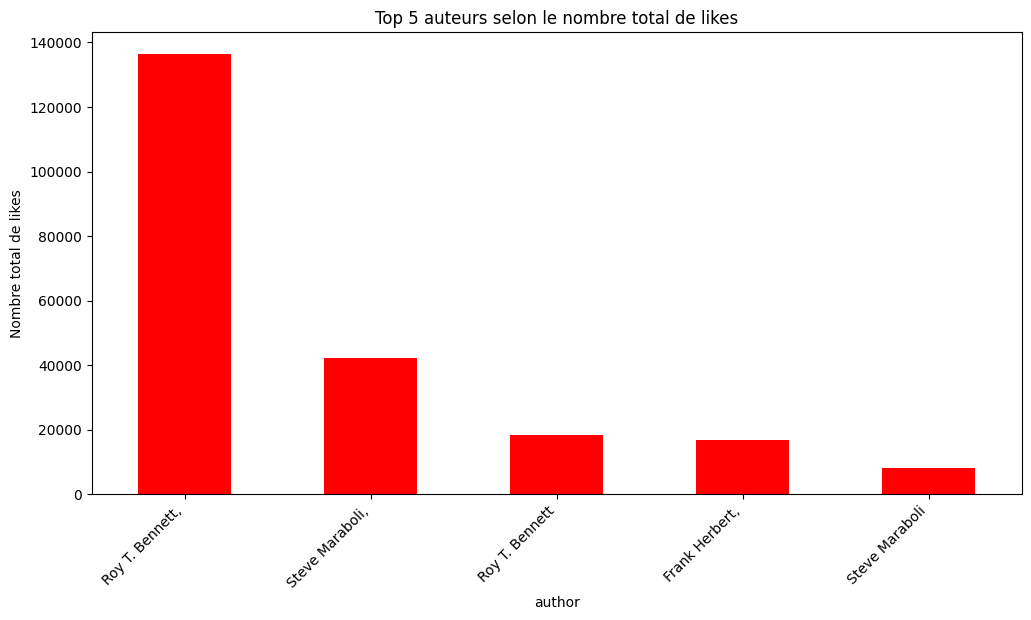

In [186]:
#Analyse par auteur / book title / tag
author_likes = df.groupby('author')['likes'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12,6))
author_likes.plot(kind='bar', color='red')
plt.title("Top 5 auteurs selon le nombre total de likes")
plt.ylabel("Nombre total de likes")
plt.xticks(rotation=45, ha='right')
plt.show()


In [187]:
!pip install  selenium
import selenium
print(selenium.__version__)

4.38.0



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Web Scraping with Selenium on Dynamic Web Sites

**Selenium** is primarily known as a testing framework that automates web browsers. However, it is an essential tool for web scraping, as it allows scripts to interact with a browser, mimicking user actions such as clicking, scrolling, and submitting forms. We will be using **Selenium WebDriver**, the Object-Oriented (OO) API core component for accessing browsers.

Selenium is especially useful when scraping websites that rely heavily on **JavaScript** to load content dynamically.

If you executr the following code with requests tool, It will fail on scraping the dynamic content generated by JS.


In [188]:
import requests
from bs4 import BeautifulSoup

url = "https://www.beinsports.com/ar-mena#news"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/116.0 Safari/537.36"
}

r = requests.get(url, headers=headers)
print(r.text[:500]) 

soup = BeautifulSoup(r.text, 'lxml')



<!DOCTYPE html><html lang="ar-mena"><head><link rel="preload" href="https://secure.widget.cloud.opta.net/v3/css/v3.football.opta-widgets.css" as="style"/><link rel="preload" href="https://secure.widget.cloud.opta.net/v3/css/v3.rtl.opta-widgets.css" as="style"/><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no, viewport-fit=cover"/><meta name="apple-itunes-app" content="app-id=1115211914"/><noscript><link rel="styleshe


In [189]:

from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep

driver = webdriver.Chrome()
driver.get("https://www.beinsports.com/ar-mena#news")

sleep(5)  
headlines = driver.find_elements(By.CSS_SELECTOR, "div.bng-line-clamp-2")

for h in headlines:
    title_text = h.get_attribute("title").strip() 
    if title_text:
        print(title_text)


الرئيس السابق للاتحاد الإسباني يتعرض لموقف محرج
تعرض لويس روبياليس الرئيس السابق للاتحاد الإسباني لكرة القدم، لرشق بالبيض خلال حفل إطلاق كتابه في مدريد.
المنتخب الإسباني يحل ضيفاًَ ثقيلاً على جورجيا
في المجموعة الخامسة ضمن التصفيات الأوروبية المؤهلة إلى كأس العالم، يحل المنتخب الإسباني ضيفاً ثقيلاً على منتخب جورجيا في مباراة تميل فيها الكفة على الورق لصالح لاروخا.
مواجهة مرتقبه بين سويسرا والسويد
تتطلع سويسرا لتعزيز صدارتها للمجموعة الثانية من التصفيات الأوروبية والاقتراب أكثر من حجز مكانها في كأس العالم، حين تستقبل السويد في الجولة قبل الأخيرة
النمسا تسعى إلى الفوز وتأمل في حسم التأهل للمونديال
في المجموعة الثامنة تأمُل النمسا في حجْزِ بطاقة العبور إلى كأس العالم عندما تُواجِه قبرص إذا ما تَعثرت مُلاحقَتُها البوسنة والهرسك.
الثنائي كوييو وتابيا يصعد إلى نصف نهائي بطولة دبي
تأهل الثنائي المكون من الإسباني أرتورو كوييو والأرجنتيني آغوستين تابيا إلى نصف نهائي بطولة دبي بريمير بادل بفوزه على الثنائي المؤلف من الإسباني خافيير ليال والبرازيلي لوكاس بيرغاميني بمجموعتين دون رد.


So the Need for Selenium
---

### 1. Prerequisites and Setup

Before running the scraping code, you must ensure the Python environment is correctly set up.

#### Required Libraries
We need to install core libraries, including the `selenium` library and `webdriver_manager` to handle the necessary browser driver automatically.

| Library | Purpose |
| :--- | :--- |
| `selenium` | Browser automation |
| `webdriver_manager` | Automatic management and installation of WebDriver executables |
| `requests` | HTTP communication (optional, but good practice) |
| `pandas` | DataFrames manipulation |

#### WebDriver Management
For Selenium versions 4.0 and higher, it is best practice to instantiate the WebDriver using the `Service` object. Instead of manually downloading and specifying the driver path, we use `ChromeDriverManager` to automatically fetch the correct executable, improving portability and simplifying setup.

---

### 2. Setting up the WebDriver (Code Block 1)

This block sets up the necessary imports and initializes the Chrome WebDriver session using `webdriver_manager` and the `Service` class.

By exectuting the next code, a simulated chrom window will be opened with An alert message `Chrome is being controlled by automated test software`, which confirms Selenium WebDriver is working.

<figure>
  <IMG src="figures/webdriver.png"  ALIGN="right">
</figure>

In [229]:
# Setup and Initialization
!pip install webdriver-manager

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By # Used for locating elements
from selenium.common.exceptions import NoSuchElementException

# Import webdriver_manager library for automatic driver handling
from webdriver_manager.chrome import ChromeDriverManager 

# Use ChromeDriverManager().install() to automatically download 
# and manage the ChromeDriver executable.
service = Service(ChromeDriverManager().install())

# Initialize the WebDriver with the service
driver = webdriver.Chrome(service=service) 

# An alert message 'Chrome is being controlled by automated test software' 
# confirms Selenium WebDriver is working.


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### 3. Example 1: Navigating in python.org home page

We want to navigate to the `PyPi` link automatically.
<figure>
  <IMG src="figures/python.png"  ALIGN="right">
</figure>

In [230]:
driver.get("http://www.python.org")
driver.find_element(By.PARTIAL_LINK_TEXT, "PyPI").click()

### Challenge 6:
Try to navigate to other links. Choose 3 different links

In [231]:
# Your Code
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
# Étape 1 : ouvrir youtube
driver.get("https://www.youtube.com")
time.sleep(2)  # attendre le chargement de la page

# Search for something  
search_box = driver.find_element(By.NAME, "search_query")
search_box.send_keys("Python tutorial")
search_box.send_keys(Keys.RETURN)
time.sleep(3)

# Click first video  
first_video = driver.find_element(By.XPATH, "(//a[@id='video-title'])[1]")
first_video.click()


In [232]:
driver.get("https://www.bbc.com/arabic")
time.sleep(4)

first_news = driver.find_element(By.CSS_SELECTOR, "a.bbc-1i4ie53")
first_news.click()



### 4. Example 2: Scraping Book Information from books.toscrape.com

This example demonstrates navigation and complex extraction, including retrieving nested data and handling navigation history using `driver.back()`. We target the **Childrens** category from `http://books.toscrape.com`.

### Step 3.1: Navigate and Select Category (Code Block 2)

We navigate to `https://toscrape.com/`, find the link leading to the bookstore using `By.PARTIAL_LINK_TEXT`, and click it.



<figure>
  <IMG src="figures/toscrap.png"  ALIGN="right">
</figure>

<figure>
  <IMG src="figures/bookStore.png"  ALIGN="right">
</figure>

<figure>
  <IMG src="figures/toscrape.png"  ALIGN="right">
</figure>

In [233]:
# Navigation to Category Page

driver.get ("https://toscrape.com/")

# Find and click the 'bookstore' link to navigate to http://books.toscrape.com
# We use find_element(By.PARTIAL_LINK_TEXT, ...) 
# and .click() to simulate a user action.
driver.find_element(By.PARTIAL_LINK_TEXT, "books").click()

# Find and click the 'Childrens' category link
driver.find_element(By.LINK_TEXT, "Childrens").click() 

categoryURL = driver.current_url
print(f"Landed on Category URL: {categoryURL}")

Landed on Category URL: https://books.toscrape.com/catalogue/category/books/childrens_11/index.html


### Step 3.2: Iterate and Extract Data (Code Block 3)

We use various locators like `By.CSS_SELECTOR`, `By.TAG_NAME`, and `By.XPATH` to identify and extract book details, including navigating to the detail page for specific fields (UPC, Availability).

<figure>
  <IMG src="figures/olorwli.png"  ALIGN="right">
</figure>

In [195]:
# Code Block 3: Iteration and Extraction

dataSet = []
# Headers for CSV export later
columns = ['Upc', 'Title', 'Price', 'Rating', 'Stock', 'Stock_Qty', 'Url', 'Image'] 
pagination = True 

while pagination:
    # Locate all book listings (<li> elements inside <ol class="row">)
    listings = driver.find_elements(By.CSS_SELECTOR, "ol.row li") 
    
    for listing in listings:
        temp = []
        try:
            # Extract basic info available in the list view
            article = listing.find_element(By.TAG_NAME, 'article')
            image_link = article.find_element(By.CSS_SELECTOR, "a")
            articleLink = image_link.get_attribute('href')
            imageSrc = image_link.find_element(By.TAG_NAME, 'img').get_attribute('src')

            title = article.find_element(By.TAG_NAME, 'h3').find_element(By.TAG_NAME, 'a').get_attribute('title')
            price = article.find_element(By.CLASS_NAME, "price_color").text
            rating = article.find_element(By.TAG_NAME, 'p').get_attribute('class')
            
            # Click the image/link to access the detail page
            image_link.find_element(By.TAG_NAME,'img').click() # This simulates clicking the element

            # --- Data from Detail Page ---
            # Locate UPC and Availability using XPath, a reliable method for nested content
            upc = driver.find_element(By.XPATH, "//th[contains(text(),'UPC')]/following-sibling::td").text
            stockQty = driver.find_element(By.XPATH, "//th[contains(text(),'Availability')]/following-sibling::td").text
            
            temp = [upc, 
                    title,
                    price,
                    rating.replace('star-rating','').strip(),
                    stockQty.split('(')[0].strip(),
                    stockQty.split('(')[1].replace('available', '').replace( ')', '').strip(), 
                    articleLink, 
                    imageSrc
                    ]
            dataSet.append(temp) # append temp list details to main dataSet.
            
          
            
            # Go back to the listing page to continue the loop using browser history
            driver.back()

        except NoSuchElementException:
            print("Element not found, skipping item.")
            driver.back() # Ensure we return if an error occurred after clicking
            continue
        
    # --- Pagination Handling ---
    try:
        # Locate the 'next' link using CSS Selector and click it to advance
        next_button = driver.find_element(By.CSS_SELECTOR, 'li.next a')
        next_button.click()
    except NoSuchElementException:
        # If 'next' button is not found, we assume we are on the last page
        pagination = False

print(f"Scraping complete. Found {len(dataSet)} books.")


Scraping complete. Found 29 books.


### Closing the Session
Always ensure the browser window is closed and the WebDriver session is terminated to release system resources.

In [196]:
# Closing the Session

driver.quit() # Closes the browser and terminates the session

### Create a dataframe based on the scraped data

In [197]:
import pandas as pd

df_dataset = pd.DataFrame(dataSet, columns=columns)
df_dataset


,Upc,Title,Price,Rating,Stock,Stock_Qty,Url,Image
0,9528d0948525bf5f,Birdsong: A Story in Pictures,£54.64,Three,In stock,19,http://books.toscrape.com/catalogue/birdsong-a...,http://books.toscrape.com/media/cache/af/6e/af...
1,9f6568e9c95f60b0,The Bear and the Piano,£36.89,One,In stock,18,http://books.toscrape.com/catalogue/the-bear-a...,http://books.toscrape.com/media/cache/cf/bb/cf...
2,b5ea0b5dabed25a8,The Secret of Dreadwillow Carse,£56.13,One,In stock,16,http://books.toscrape.com/catalogue/the-secret...,http://books.toscrape.com/media/cache/c4/a2/c4...
3,37c0cb19713d8dda,The White Cat and the Monk: A Retelling of the...,£58.08,Four,In stock,15,http://books.toscrape.com/catalogue/the-white-...,http://books.toscrape.com/media/cache/26/32/26...
4,4aa03792b50f0b22,Little Red,£13.47,Three,In stock,15,http://books.toscrape.com/catalogue/little-red...,http://books.toscrape.com/media/cache/80/25/80...
5,6a31307a81e8f3a8,Walt Disney's Alice in Wonderland,£12.96,Five,In stock,14,http://books.toscrape.com/catalogue/walt-disne...,http://books.toscrape.com/media/cache/28/50/28...
6,1d6443ffba9dfd80,Twenty Yawns,£22.08,Two,In stock,14,http://books.toscrape.com/catalogue/twenty-yaw...,http://books.toscrape.com/media/cache/2b/38/2b...
7,a6454e329f872b78,Rain Fish,£23.57,Three,In stock,14,http://books.toscrape.com/catalogue/rain-fish_...,http://books.toscrape.com/media/cache/bb/e2/bb...
8,e34efcc824685332,Once Was a Time,£18.28,Two,In stock,14,http://books.toscrape.com/catalogue/once-was-a...,http://books.toscrape.com/media/cache/97/12/97...
9,5b43cae640f2338a,Luis Paints the World,£53.95,Three,In stock,14,http://books.toscrape.com/catalogue/luis-paint...,http://books.toscrape.com/media/cache/85/e7/85...


### Challenge 7:
Automate the scrapping done in Challenge 5 of Goodreads while using Selenium. The navigation should be done automatically. Try with more than 5 paginations

In [234]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

driver.get("https://www.goodreads.com/quotes/tag/motivational?page=1")
time.sleep(3)
quotes_list = []
max_pages = 5  # عدد الصفحات اللي نريدها
current_page = 1

while current_page <= max_pages:
    quotes = driver.find_elements(By.CSS_SELECTOR, "div.quote")
    
    for quote in quotes:
        try:
           
            text_div = quote.find_element(By.CLASS_NAME, "quoteText")
            full_text = text_div.text.replace('\n',' ').strip()
            text = full_text.split('”')[0].replace('“','').replace('”','').strip()
            
            # الكاتب / المؤلف
            author_span = text_div.find_element(By.CLASS_NAME, "authorOrTitle")
            author = author_span.text.strip()
            
          
            try:
                tag_div = quote.find_element(By.CSS_SELECTOR, "div.greyText.smallText.left")
                tags = [t.strip() for t in tag_div.text.replace('tags:','').split(',')]
            except NoSuchElementException:
                tags = []
            
           
            try:
                likes_span = quote.find_element(By.CSS_SELECTOR, "a.smallText")
                likes = int(likes_span.text.split()[0])
            except:
                likes = 0
            
            quotes_list.append({
                "quote_text": text,
                "author": author,
                "tags": tags,
                "likes": likes
            })
            
        except NoSuchElementException:
            continue
  
    try:
        next_button = driver.find_element(By.CLASS_NAME, "next_page")
        if "disabled" in next_button.get_attribute("class"):
            break 
        next_button.click()
        current_page += 1
        time.sleep(2)  
    except NoSuchElementException:
        break
df = pd.DataFrame(quotes_list)
print(df.head())
print(f"Total quotes scraped: {len(df)}")


                                          quote_text           author  \
0  I must not fear. Fear is the mind-killer. Fear...   Frank Herbert,   
1  Attitude is a choice. Happiness is a choice. O...  Roy T. Bennett,   
2  Don't be pushed around by the fears in your mi...  Roy T. Bennett,   
3  Believe in yourself. You are braver than you t...  Roy T. Bennett,   
4  Live the Life of Your Dreams: Be brave enough ...  Roy T. Bennett,   

                                                tags  likes  
0  [bene-gesserit, fear, litany-against-fear, mot...  16703  
1  [attitude, choice, giving, happiness, inspirat...   9937  
2  [dreams, fearless, heart, inspiration, inspira...   9722  
3  [achievement, believe-in-yourself, brave, cour...   6954  
4  [brave, courage, dreams, inspiration, inspirat...   6682  
Total quotes scraped: 150


### 5 Example 3: Handling User Authentication on quotes.toscrape.com

Selenium is ideal for scenarios requiring authentication (user login/logout) and dealing with HTML forms. This example simulates logging in and logging out of the quotes site.

<figure>
  <IMG src="figures/login.png"  ALIGN="right">
</figure>

In [235]:
# Code Block 4: Login Automation
# Initialize the WebDriver with the service
driver = webdriver.Chrome(service=service) 
# Navigate specifically to the login page
loginPage = "http://quotes.toscrape.com/login"
driver.get(loginPage) 
print(f"Before Login: {driver.current_url}") 

# 1. Locate and fill the username field (identified by ID 'username')
username = driver.find_element(By.ID, "username")
username.clear()  # Cleans if there is existing text
username.send_keys("test") # Input test credentials

# 2. Locate and fill the password field (identified by ID 'password')
password = driver.find_element(By.ID, "password")
password.clear()
password.send_keys("test")

# 3. Click the submit button (identified by class 'btn')
driver.find_element(By.CLASS_NAME, 'btn').click() # Simulates submission

# 4. Verification: Check the current URL and look for the 'Logout' link
quotesUrl = driver.current_url
print(f"After Login: {quotesUrl}") 

try:
    logout_element = driver.find_element(By.LINK_TEXT, "Logout")
    print(f"Login successful! Logout link found: {logout_element.get_attribute('href')}")
    
    # Perform logout action
    logoutUrl = logout_element.get_attribute('href')
    driver.get(logoutUrl)
    print(f"Logged out. Current URL: {driver.current_url}")
    
except NoSuchElementException:
    print("Login failed or Logout element not found.")


Before Login: https://quotes.toscrape.com/login
After Login: https://quotes.toscrape.com/
Login successful! Logout link found: https://quotes.toscrape.com/logout
Logged out. Current URL: https://quotes.toscrape.com/


### Challenge 8: Web Interaction & Form Automation

#### Objective:
Automate a search operation on the `Python.org` homepage by simulating user interactions with input fields and buttons.

#### Requirements:

  -  Navigate to https://www.python.org

  -  Locate the `Search` input field in the page header

  -  Enter a specific search term (e.g., "download", "documentation", "tutorial")

  -  Click the `Go` button or simulate form submission

  -  Wait for and capture the search results page



<figure>
  <IMG src="figures/python_input.png"  ALIGN="right">
</figure>

In [236]:
#Your Code here
# Étape 0 : imports et setup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
import time

# Lancer ChromeDriver automatiquement
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Étape 1 : aller sur Python.org
driver.get("https://www.python.org")
time.sleep(2)  # attendre le chargement

# Étape 2 : localiser le champ de recherche
search_input = driver.find_element(By.ID, "id-search-field")

# Étape 3 : entrer le terme de recherche
search_term = "download"  # tu peux changer en "documentation" ou "tutorial"
search_input.clear()       # vider le champ au cas où
search_input.send_keys(search_term)

# Étape 4 : simuler l'appui sur Enter (ou cliquer sur le bouton)
search_input.send_keys(Keys.RETURN)

# Étape 5 : attendre le chargement des résultats
time.sleep(3)  # attendre que la page des résultats charge

# Étape 6 : récupérer et afficher le titre de la page des résultats
print("Titre de la page de résultats :", driver.title)

# Facultatif : récupérer les 5 premiers liens des résultats
results = driver.find_elements(By.CSS_SELECTOR, "ul.list-recent-events li h3 a")[:5]
for i, res in enumerate(results, 1):
    print(f"{i}. {res.text} --> {res.get_attribute('href')}")

# Étape 7 : fermer le navigateur
driver.quit()


Titre de la page de résultats : Welcome to Python.org
1. Python 2.1 --> https://www.python.org/download/releases/2.1
2. Releases --> https://www.python.org/download/releases
3. Python 2.1.3 --> https://www.python.org/downloads/release/python-213/
4. Python 2.1.3 --> https://www.python.org/download/releases/2.1.3
5. Python 2.1.1 --> https://www.python.org/download/releases/2.1.1


### Challenge 9: Detailed Quotes Scraping with Text Analysis

#### Objective:
Automate the scraping of `https://quotes.toscrape.com/` to create a comprehensive dataset, then perform text analysis on the collected content.

#### Requirements:

  -  Navigate through all pages of the main quotes listing

  -  For each quote, extract: author, quote, tags

  -  For each author, navigate to their `about` page and scrape: `birthDate`, `birthPlace`, `country`, `bio` ==> (Description)

  -  Combine all data into a structured pandas DataFrame with the specified columns

  -  Implement proper error handling for missing author information

#### Text Analysis Component:

  - Perform basic text analysis on the quote column:

       * Most common words

       * Average quote length

  - Analyze bio content:

       * Identify most frequent biographical terms

<figure>
  <IMG src="figures/quotes.png"  ALIGN="right">
</figure>

<figure>
  <IMG src="figures/about.png"  ALIGN="right">
</figure>

In [64]:
# Étape 0 : imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

# Étape 1 : config du driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Liste pour stocker toutes les données
all_data = []

# URL de base
base_url = "http://quotes.toscrape.com"

# Étape 2 : naviguer sur toutes les pages
page_number = 1
while True:
    url = f"{base_url}/page/{page_number}/"
    driver.get(url)
    time.sleep(2)
    
    quotes = driver.find_elements(By.CLASS_NAME, "quote")
    if not quotes:
        break  # plus de quotes, fin
    
    for quote in quotes:
        try:
            quote_text = quote.find_element(By.CLASS_NAME, "text").text.strip()
            author = quote.find_element(By.CLASS_NAME, "author").text.strip()
            tags_elements = quote.find_elements(By.CLASS_NAME, "tag")
            tags = [t.text for t in tags_elements]
            
            # Naviguer sur la page auteur
            author_link = quote.find_element(By.TAG_NAME, "a").get_attribute("href")
            driver.get(author_link)
            time.sleep(1)
            
            try:
                birth_date = driver.find_element(By.CLASS_NAME, "author-born-date").text
            except:
                birth_date = None
                
            try:
                birth_place = driver.find_element(By.CLASS_NAME, "author-born-location").text
            except:
                birth_place = None
                
            try:
                bio = driver.find_element(By.CLASS_NAME, "author-description").text
            except:
                bio = None
            
            all_data.append({
                "quote": quote_text,
                "author": author,
                "tags": tags,
                "birth_date": birth_date,
                "birth_place": birth_place,
                "bio": bio
            })
            
            # Retour à la page des quotes
            driver.back()
            time.sleep(1)
            
        except Exception as e:
            print(f"Erreur quote: {e}")
            continue
    
    page_number += 1

# Étape 3 : créer DataFrame
df = pd.DataFrame(all_data)
print(df.head())
print(f"Total quotes scraped: {len(df)}")

# Sauvegarder CSV
df.to_csv("quotes_toscrape_full.csv", index=False)

# Fermer driver
driver.quit()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zbook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zbook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                             tags         birth_date  \
0        [change, deep-thoughts, thinking, world]     March 14, 1879   
1                            [abilities, choices]      July 31, 1965   
2  [inspirational, life, live, miracle, miracles]     March 14, 1879   
3              [aliteracy, books, classic, humor]  December 16, 1775   
4                    [be-yourself, inspirational]      June 01, 1926   

                                         birth_place  \
0                                    in Ulm, Germany   
1  in Yate, Sout

In [65]:
#Étape 4 : Analyse textuelle des quotes
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Nettoyage et tokenisation
stop_words = set(stopwords.words('english'))
all_text = ' '.join(df['quote']).lower()
tokens = nltk.word_tokenize(all_text)
words = [w for w in tokens if w.isalpha() and w not in stop_words]

# Mots les plus fréquents
word_freq = Counter(words)
most_common_words = word_freq.most_common(20)
print("Top 20 mots les plus fréquents dans les quotes :")
for w,f in most_common_words:
    print(w,f)

# Longueur moyenne des quotes
avg_length = sum(len(q.split()) for q in df['quote']) / len(df)
print(f"Longueur moyenne des quotes (en mots): {avg_length:.2f}")


Top 20 mots les plus fréquents dans les quotes :
love 20
one 13
never 13
think 12
life 11
make 10
like 9
good 8
live 7
know 7
day 7
going 7
give 7
keep 7
may 7
people 7
see 7
world 6
without 6
truth 6
Longueur moyenne des quotes (en mots): 23.63


In [66]:
#Étape 5 : Analyse du bio des auteurs
all_bio_text = ' '.join([b for b in df['bio'] if b]).lower()
tokens_bio = nltk.word_tokenize(all_bio_text)
bio_words = [w for w in tokens_bio if w.isalpha() and w not in stop_words]

bio_freq = Counter(bio_words)
most_common_bio_terms = bio_freq.most_common(20)
print("Top 20 mots fréquents dans les bios :")
for w,f in most_common_bio_terms:
    print(w,f)


Top 20 mots fréquents dans les bios :
rowling 144
first 137
name 110
published 104
also 102
one 94
einstein 90
new 84
american 84
life 77
born 76
called 71
theory 70
world 70
school 70
wrote 62
time 61
english 60
geisel 60
death 59


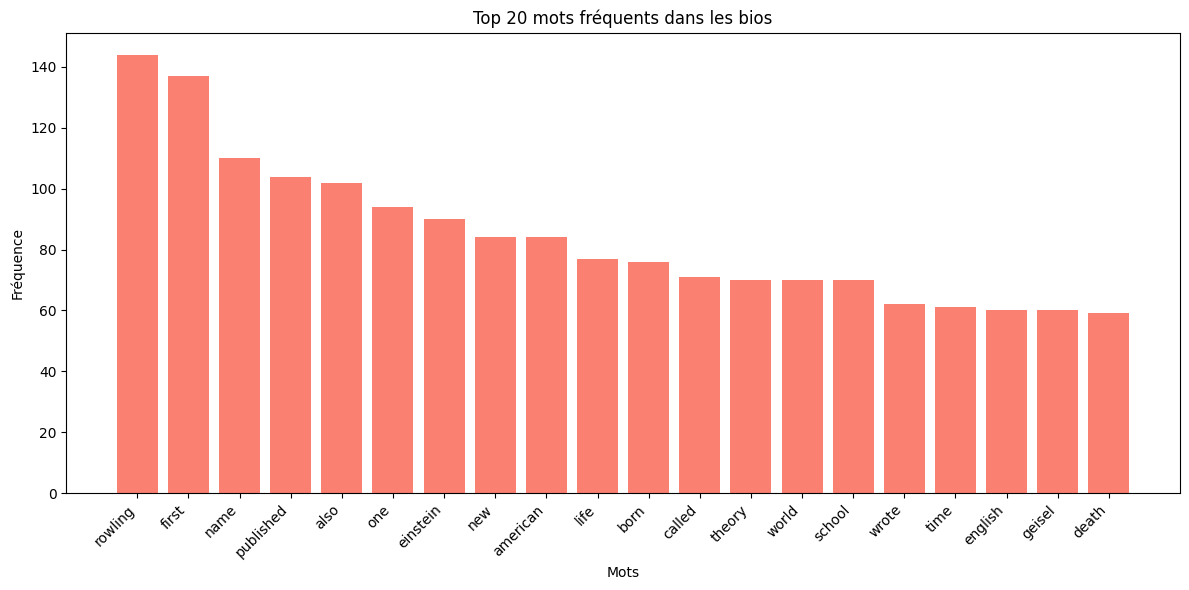

In [68]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk

# Extraire les mots et leurs fréquences
words, freqs = zip(*most_common_bio_terms)

# Création du plot
plt.figure(figsize=(12,6))
plt.bar(words, freqs, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 mots fréquents dans les bios")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


## 5. Cleaning Up

Always ensure the browser window is closed and the WebDriver session is terminated to release system resources.

In [67]:
# Code Block 5: Closing the Session

driver.quit() # Closes the browser and terminates the session

## Conclusion

By using **Selenium WebDriver** coupled with libraries like `webdriver_manager`, you can manage complex web interactions, JavaScript-loaded content, and authentication barriers effectively. The key to success lies in choosing precise **locators** (like `By.ID`, `By.XPATH`, or `By.CSS_SELECTOR`) and utilizing WebDriver methods (like `click()`, `send_keys()`, and `get()`) to mirror authentic user behavior. Selenium acts as a specialized web browser, allowing your code to bypass modern anti-scraping measures that static HTML scraping cannot overcome.

# Using APIs to collect data
Data can be collected as json format using APIs
For example: 
let’s use one of the MISO's APIs listed in https://www.misoenergy.org/markets-and-operations/RTDataAPIs/

Json file returned from Day Ahead Wind Forecast API

### Using request to get json data


In [206]:
import requests as rq


url = 'https://public-api.misoenergy.org/api/RealTimeTotalLoad'

res = rq.get(url)
res.json()  


{'LoadInfo': {'RefId': '15-Nov-2025 - Interval 11:05 EST',
  'ClearedMW': [{'ClearedMWHourly': {'Hour': '1', 'Value': '58968'}},
   {'ClearedMWHourly': {'Hour': '2', 'Value': '57686'}},
   {'ClearedMWHourly': {'Hour': '3', 'Value': '56182'}},
   {'ClearedMWHourly': {'Hour': '4', 'Value': '55969'}},
   {'ClearedMWHourly': {'Hour': '5', 'Value': '55953'}},
   {'ClearedMWHourly': {'Hour': '6', 'Value': '57507'}},
   {'ClearedMWHourly': {'Hour': '7', 'Value': '59254'}},
   {'ClearedMWHourly': {'Hour': '8', 'Value': '62783'}},
   {'ClearedMWHourly': {'Hour': '9', 'Value': '62570'}},
   {'ClearedMWHourly': {'Hour': '10', 'Value': '63437'}},
   {'ClearedMWHourly': {'Hour': '11', 'Value': '64603'}},
   {'ClearedMWHourly': {'Hour': '12', 'Value': '64452'}},
   {'ClearedMWHourly': {'Hour': '13', 'Value': '63624'}},
   {'ClearedMWHourly': {'Hour': '14', 'Value': '62857'}},
   {'ClearedMWHourly': {'Hour': '15', 'Value': '62254'}},
   {'ClearedMWHourly': {'Hour': '16', 'Value': '63313'}},
   {'Clea

### Creating a DataFrame from json data


In [210]:
print(data.keys())
df = pd.json_normalize(res.json()['LoadInfo'])
df.head()

dict_keys(['LoadInfo'])


,RefId,ClearedMW,MediumTermLoadForecast,FiveMinTotalLoad
0,15-Nov-2025 - Interval 11:05 EST,"[{'ClearedMWHourly': {'Hour': '1', 'Value': '5...","[{'Forecast': {'HourEnding': '1', 'LoadForecas...","[{'Load': {'Time': '00:00', 'Value': '64676'}}..."


### Challenge 10: JSON API Data Collection

#### Objective:
Find a public website that provides a JSON API endpoint, collect data from it, and structure the results in a pandas DataFrame.

#### Requirements:

  - Identify a public API (e.g., weather data, news feeds, financial information, or government open data)

  - Make a request to the API endpoint and handle potential errors

  - Parse the JSON response and extract relevant data fields

  - Transform the data into a structured pandas DataFrame

  - Perform basic data validation (check for missing values, correct data types)

In [ ]:
# Your Code here
# Step 1: Import libraries
import requests
import pandas as pd
city = "Sidi Bel Abbes" 
# Step 2: Define the API endpoint
url = f"http://wttr.in/{city}?format=j1"
# Step 3: Make the API request with error handling
try:
    response = requests.get(url)
    response.raise_for_status()  # raise an error if status code is not 200
except requests.exceptions.HTTPError as errh:
    print("HTTP Error:", errh)
except requests.exceptions.ConnectionError as errc:
    print("Connection Error:", errc)
except requests.exceptions.Timeout as errt:
    print("Timeout Error:", errt)
except requests.exceptions.RequestException as err:
    print("Something went wrong:", err)
else:
    data = response.json()  # parse JSON response
print (data.keys())
# Step 4: Transform JSON data into a pandas DataFrame
df = pd.json_normalize(data['current_condition'])
df['weatherDesc'] = df['weatherDesc'].apply(lambda x: x[0]['value'])
df['weatherIconUr'] = df['weatherIconUr'].apply(lambda x: x[0]['value'])
 
df_weather = pd.json_normalize(data['weather'])
df_area = pd.json_normalize(data['nearest_area'])

# Step 5: Basic data validation
print("DataFrame info:")
print(df.info())  # check column types and non-null counts
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 6: Show first few rows
print("\nFirst 5 rows:")
print(df.head())




In [224]:
print(df_weather.head())

                                           astronomy avgtempC avgtempF  \
0  [{'moon_illumination': '23', 'moon_phase': 'Wa...       18       65   
1  [{'moon_illumination': '16', 'moon_phase': 'Wa...       18       64   
2  [{'moon_illumination': '9', 'moon_phase': 'Wan...       14       57   

         date                                             hourly maxtempC  \
0  2025-11-15  [{'DewPointC': '6', 'DewPointF': '42', 'FeelsL...       25   
1  2025-11-16  [{'DewPointC': '7', 'DewPointF': '45', 'FeelsL...       22   
2  2025-11-17  [{'DewPointC': '13', 'DewPointF': '55', 'Feels...       15   

  maxtempF mintempC mintempF sunHour totalSnow_cm uvIndex  
0       77       14       58    10.0          0.0       1  
1       72       15       60     9.8          0.0       1  
2       60       12       54     8.3          0.0       0  
